In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from tqdm import tqdm
import time



In [ ]:
# Training varibles 
X_train  = pd.read_csv('train_values.csv')
y_train = pd.read_csv('train_labels.csv')


In [ ]:
X_train  

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [ ]:
y_train = y_train["damage_grade"]


In [ ]:
y_train = np.asarray(y_train)

In [ ]:
y_train

array([3, 2, 3, ..., 3, 2, 3])

In [ ]:
#Testing varibles 
X_test  = pd.read_csv('test_values.csv')

In [ ]:
X_test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,...,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0


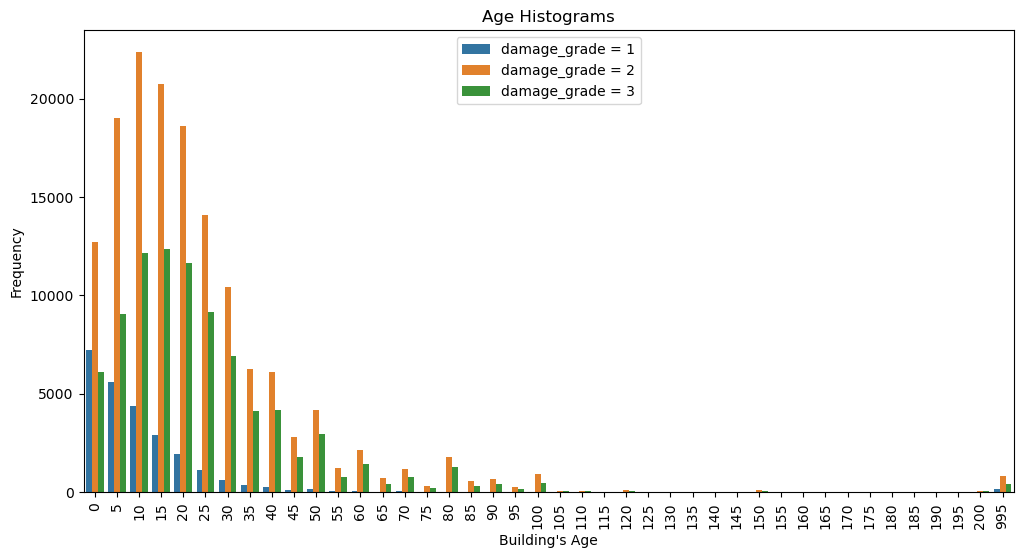

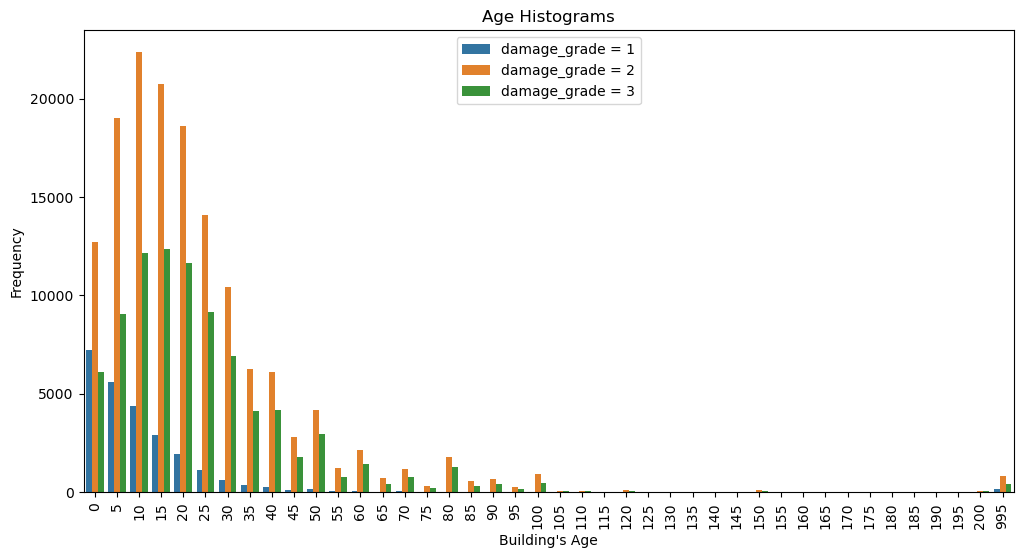

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=X_train["age"],hue=y_train)
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Age Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(x=X_train["age"],hue=y_train)
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Age Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

In [ ]:
X_train.drop(columns=["building_id"], inplace=True)
X_test.drop(columns=["building_id"], inplace=True)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first = True)


# Fixing the issue with categorical data labeled as strings

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for column in X_train.columns:
    #print("hehe")
    X_train[column] = le.fit_transform(X_train[column])

In [ ]:
# Descison Tree metric
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)

# getting train, test from orignal training data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2)

# Decison Tree no class imbalance incorperated


In [ ]:
model = dt.fit(X_train, y_train)


In [ ]:
y_pred_dt = model.predict(X_test)


In [ ]:
print("Training Score: {}".format(dt.score(X_train, y_train)))


Training Score: 0.7472851112816578


In [ ]:
print("Test Score: {}".format(dt.score(X_test, y_test)))


Test Score: 0.7161221004969206


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           1       0.61      0.45      0.52      5025
           2       0.72      0.83      0.77     29652
           3       0.73      0.61      0.66     17444

    accuracy                           0.72     52121
   macro avg       0.69      0.63      0.65     52121
weighted avg       0.71      0.72      0.71     52121



In [ ]:
f1_score(y_test, y_pred_dt, average='micro')

0.7161221004969207

# No class imbalance Random Forrest


In [ ]:
## RAMAN: run this analysis varying max_depth

In [ ]:
#No class imbalance Random Forrest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)

In [ ]:
model = rf.fit(X_train, y_train)


In [ ]:
y_pred_rf_no_class_imbalance = model.predict(X_test)


In [ ]:
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

Training Score: 0.755132386799693
Test Score: 0.7308186719364556


In [ ]:
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

Training Score: 0.7538420951650039
Test Score: 0.7298593657067209


In [ ]:
f1_score(y_test, y_pred_rf_no_class_imbalance, average='micro')

0.7298593657067209

In [ ]:
print(classification_report(y_test, y_pred_rf_no_class_imbalance))

              precision    recall  f1-score   support

           1       0.68      0.42      0.52      5025
           2       0.72      0.86      0.78     29652
           3       0.76      0.60      0.67     17444

    accuracy                           0.73     52121
   macro avg       0.72      0.63      0.66     52121
weighted avg       0.73      0.73      0.72     52121



In [ ]:
results = list(zip(X_train, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

,Feature,Importance
0,geo_level_1_id,0.369301
1,geo_level_2_id,0.190293
33,foundation_type_r,0.106070
2,geo_level_3_id,0.087721
4,age,0.039637
5,area_percentage,0.033062
8,has_superstructure_mud_mortar_stone,0.031760
6,height_percentage,0.021660
32,foundation_type_i,0.013819
42,other_floor_type_q,0.012921


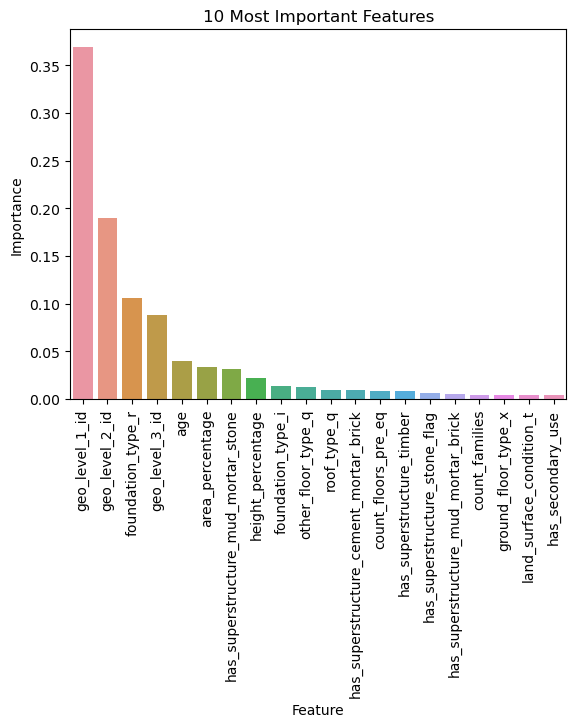

In [ ]:
importance_10 = importance.head(20)
plot = sns.barplot(x=importance_10["Feature"], y=importance_10["Importance"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("10 Most Important Features")
plt.show()

# class imbalance Random Forrest


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf = RandomForestClassifier(max_features = None,
                            max_depth = 24,
                            min_samples_split = 3,
                            min_samples_leaf = 100,
                            random_state=42,
                           class_weight= "balanced")

In [ ]:
model = rf.fit(X_train, y_train)


In [ ]:
y_pred_rf_wtih_class_imbalance = model.predict(X_test)


In [ ]:
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

Training Score: 0.6532473138910208
Test Score: 0.642888662918977


In [ ]:
print(classification_report(y_test, y_pred_rf_wtih_class_imbalance))

              precision    recall  f1-score   support

           1       0.38      0.82      0.52      5025
           2       0.77      0.57      0.66     29652
           3       0.64      0.71      0.68     17444

    accuracy                           0.64     52121
   macro avg       0.60      0.70      0.62     52121
weighted avg       0.69      0.64      0.65     52121



In [ ]:
f1_score(y_test, y_pred_rf_wtih_class_imbalance, average='micro')

0.642888662918977

In [ ]:
print(classification_report(y_test, y_pred_rf_wtih_class_imbalance))

              precision    recall  f1-score   support

           1       0.38      0.82      0.52      5025
           2       0.77      0.57      0.66     29652
           3       0.64      0.71      0.68     17444

    accuracy                           0.64     52121
   macro avg       0.60      0.70      0.62     52121
weighted avg       0.69      0.64      0.65     52121



In [ ]:
results = list(zip(X_train, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

,Feature,Importance
0,geo_level_1_id,0.362325
33,foundation_type_r,0.328392
1,geo_level_2_id,0.102049
8,has_superstructure_mud_mortar_stone,0.056511
4,age,0.028607
2,geo_level_3_id,0.027383
12,has_superstructure_cement_mortar_brick,0.010827
42,other_floor_type_q,0.010158
5,area_percentage,0.009988
6,height_percentage,0.009960


# balanced random forrest

In [ ]:
### might need to scrap this 

In [ ]:
#Importing essential libraries
#https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=2)


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [ ]:
scoring = ('f1', 'recall', 'precision')


In [ ]:
scores = cross_validate(BRFC, X_train, y, scoring=scoring, cv=cv)


In [ ]:
X_train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
170377,13,253,7558,2,5,1,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
184895,6,1063,8319,2,8,9,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
26740,7,827,9689,1,9,7,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
198210,7,547,2494,1,6,6,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
254313,17,673,939,2,6,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,13,898,1464,1,5,5,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0
103694,10,1380,7407,1,1,4,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
131932,8,1060,4755,2,4,21,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
146867,10,75,1656,2,2,10,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_test

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
111801,10,1224,11128,1,20,7,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0
91817,22,1101,12483,2,60,7,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
251661,26,39,11440,2,50,6,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
205479,8,1073,2743,3,50,7,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22618,6,706,7959,2,15,8,4,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209800,17,51,8163,3,5,9,7,0,1,0,...,0,0,0,0,0,0,1,0,1,0
45779,20,922,1378,2,10,8,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
177645,7,1233,5131,2,35,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36857,10,142,3523,2,15,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from collections import Counter

print(Counter(y_train))


Counter({2: 118607, 3: 69774, 1: 20099})


In [ ]:
BRFC.fit(X_train, y_train)


BalancedRandomForestClassifier(n_estimators=150, random_state=2)

In [ ]:
y_pred_BEFC = BRFC.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred_BEFC))

              precision    recall  f1-score   support

           1       0.40      0.83      0.54      5025
           2       0.78      0.57      0.66     29652
           3       0.63      0.73      0.67     17444

    accuracy                           0.65     52121
   macro avg       0.60      0.71      0.63     52121
weighted avg       0.69      0.65      0.65     52121



In [ ]:
f1_score(y_test, y_pred_dt, average='micro')

0.7161221004969207

In [ ]:
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier


In [ ]:
#Build SRF model
SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRF, X_train, y_train, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: nan
Mean recall: nan
Mean precision: nan


In [ ]:
y_train_012

[1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,


# make y-train and y_test into 0, 1, 2 for smote 

In [ ]:
y_train
y_train_012 = []
for i in range(len(y_train)):
    if y_train[i] == 1:
        y_train_012.append(0)
    elif y_train[i] == 2:
        y_train_012.append(1)
    elif y_train[i] == 3:
        y_train_012.append(2)

In [ ]:
y_test = np.asarray(y_test)
y_test_012 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        y_test_012.append(0)
    elif y_test[i] == 2:
        y_test_012.append(1)
    elif y_test[i] == 3:
        y_test_012.append(2)

In [ ]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)


In [ ]:
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)

In [ ]:
f1_score(y_test, preds, average='micro')

0.6707277297058767

In [ ]:
model_imbalanced = BaggingClassifier()

In [ ]:
model = BaggingClassifier()


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


# SMOTE + XGBoost before parameter tuning

In [ ]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                
                                ['xgb_model', XGBClassifier(objective ='multi:softmax', num_class=3, use_label_encoder = False, max_depth = 12)]])


In [ ]:
param_grid = {'xgb_model__reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid , scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5) )

In [ ]:
SMOTE = grid_search.fit(X_train, y_train_012)


In [ ]:
y_pred_test_XGBoost_SMOTE = SMOTE.predict(X_test)


In [ ]:
f1_score(y_test_012, y_pred_test_XGBoost_SMOTE, average='micro')

0.7277488920013048

In [ ]:
print(classification_report(y_test_012, y_pred_test_XGBoost_SMOTE))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60      5025
           1       0.77      0.77      0.77     29652
           2       0.71      0.69      0.70     17444

    accuracy                           0.73     52121
   macro avg       0.68      0.70      0.69     52121
weighted avg       0.73      0.73      0.73     52121

